In [6]:
using Revise
using LinearAlgebra
using AdaptiveTransportMap
using Statistics
using Distributions
using SpecialFunctions
using BenchmarkTools
using Test
using ForwardDiff
using LoopVectorization

In [7]:
using Plots
default(tickfont = font("CMU Serif", 9), 
        titlefont = font("CMU Serif", 14), 
        guidefont = font("CMU Serif", 12),
        legendfont = font("CMU Serif", 10),
        grid = false)
pyplot()

using LaTeXStrings
PyPlot.rc("text", usetex = "true")
PyPlot.rc("font", family = "CMU Serif")
# gr()
using ColorSchemes

In [2]:
X = randn(10, 100)

10×100 Matrix{Float64}:
  0.827927  -0.330211    0.700308  …   0.823429  -0.439096  -0.117619
 -0.413375   1.0998      0.333048      0.278481   0.804859  -0.0855966
 -0.856632   0.700048    1.12452       1.36982    1.61381    1.3606
  2.02371   -1.20267    -0.496931     -0.529751  -0.869083  -0.310355
  1.76477   -1.41182    -0.104399      1.85689    0.231287   1.27339
 -1.06678    0.243855    1.74892   …  -0.640626   0.424608  -0.25837
 -1.12398    0.0601705  -0.375314      0.553608   0.597796  -0.733731
  1.02627    0.788525    1.2037       -0.790971   0.100232  -0.333114
  0.616754   1.21963     1.98125      -0.454058   0.741883  -0.407818
  0.293214   0.222943    0.522418     -1.46471   -0.273556  -0.457825

In [3]:
S = HermiteMap(10, X; diag = true, b = "CstLinProHermite")

Hermite map of dimension 10:
Map component of dimension 1 with Nψ 1 active features
Map component of dimension 2 with Nψ 1 active features
Map component of dimension 3 with Nψ 1 active features
Map component of dimension 4 with Nψ 1 active features
Map component of dimension 5 with Nψ 1 active features
Map component of dimension 6 with Nψ 1 active features
Map component of dimension 7 with Nψ 1 active features
Map component of dimension 8 with Nψ 1 active features
Map component of dimension 9 with Nψ 1 active features
Map component of dimension 10 with Nψ 1 active features


In [4]:
@time optimize(S, X, "kfolds"; withqr = true, verbose = false, hessprecond = true)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:09


 36.237685 seconds (83.57 M allocations: 5.174 GiB, 4.14% gc time, 98.18% compilation time)


Hermite map of dimension 10:
Map component of dimension 1 with Nψ 1 active features
Map component of dimension 2 with Nψ 1 active features
Map component of dimension 3 with Nψ 5 active features
Map component of dimension 4 with Nψ 1 active features
Map component of dimension 5 with Nψ 5 active features
Map component of dimension 6 with Nψ 1 active features
Map component of dimension 7 with Nψ 1 active features
Map component of dimension 8 with Nψ 1 active features
Map component of dimension 9 with Nψ 1 active features
Map component of dimension 10 with Nψ 1 active features


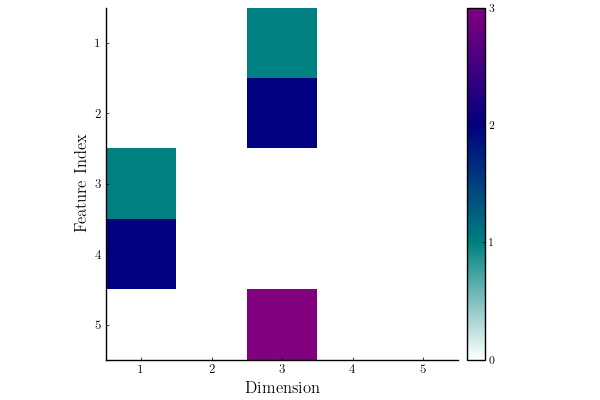

In [10]:
plot(S.C[5].I.f)

In [2]:
# using Plots
# default(tickfont = font("CMU Serif", 9), 
#         titlefont = font("CMU Serif", 14), 
#         guidefont = font("CMU Serif", 12),
#         legendfont = font("CMU Serif", 10),
#         grid = false)
# pyplot()

# using LaTeXStrings
# PyPlot.rc("text", usetex = "true")
# PyPlot.rc("font", family = "CMU Serif")
# # gr()
# using ColorSchemes

## Adding linear function to the set of features

https://math.stackexchange.com/questions/2753316/generating-a-random-tridiagonal-symmetric-positive-definite-matrix

In [11]:
function triposdef(N)
#     The function generates a random tridiagonal symmetric 
#     positive definite N by N matrix;
    b = randn(N-1);
    a = [abs.(b); 0] + [0; abs.(b)] + abs.(randn(N));
    return SymTridiagonal(a, b)
end

triposdef (generic function with 1 method)

In [12]:
Nx = 10
Ne = 5000

Σ = Matrix(triposdef(10))
L = cholesky(Σ)
πX = MvNormal(zeros(Nx), Σ)

FullNormal(
dim: 10
μ: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Σ: [1.799977726910084 -1.2710031277547527 … 0.0 0.0; -1.2710031277547527 1.9998142504744736 … 0.0 0.0; … ; 0.0 0.0 … 2.5363048299449256 0.48736717774054455; 0.0 0.0 … 0.48736717774054455 1.0588573538383155]
)


In [13]:
X = rand(πX, Ne)

# X = randn(Nx, Ne).^2 + randn(Nx, Ne) .+ randn(Nx) 

10×5000 Matrix{Float64}:
 -1.75605    0.298408   2.43454   …   1.18959    0.801588  -0.521807
  2.20878   -0.740353  -0.561104     -0.234028  -1.66734    1.11025
 -1.09635    0.580696  -0.233264      0.508054  -0.200635  -1.20261
 -1.83717   -2.99501   -1.29036      -1.58589    0.681297  -2.36063
 -1.76587   -3.7907    -1.17588      -1.72831    2.37607   -0.841539
  1.4299     1.64954    1.45144   …  -0.648666   1.56303    0.465264
 -2.23947    1.35618   -0.22         -0.744631   1.48166    1.15091
 -1.20777   -1.33091   -0.521699      0.908563   4.51627   -0.449185
  0.679797   3.18355    0.331697     -0.623694  -4.2661     0.0234081
 -2.05359    1.43926   -0.901756     -0.461244  -1.45512    0.894178

In [14]:
m = 30
S = HermiteMap(m, X; diag = true, α = 1.0e-6);

In [ ]:
S = optimize(S, X, "kfolds"; withqr = true, verbose = true, hessprecond = true)

1 terms - Training error: 1.4257098434228967, Validation error: 1.3913532923317804
1 terms - Training error: 1.4256733068002376, Validation error: 1.3916432870646374
2 terms - Training error: 1.4255491922986974, Validation error: 1.3925698118714243
3 terms - Training error: 1.4255230381317743, Validation error: 1.3925594084936477
4 terms - Training error: 1.4255197967201538, Validation error: 1.3925713761289107
5 terms - Training error: 1.4253744038483513, Validation error: 1.3928854697970259
6 terms - Training error: 1.4253062996106198, Validation error: 1.3931294254101632
7 terms - Training error: 1.4248595737160783, Validation error: 1.3930254685742784
8 terms - Training error: 1.424859317985886, Validation error: 1.3930332957952023
9 terms - Training error: 1.4248526395729084, Validation error: 1.3927125536719844
10 terms - Training error: 1.4248486460359884, Validation error: 1.3928083920524383
11 terms - Training error: 1.4248436398881796, Validation error: 1.3928219345019868
12 

9 terms - Training error: 1.417715544640641, Validation error: 1.4205950828796516
10 terms - Training error: 1.417715544514099, Validation error: 1.420595279728204
11 terms - Training error: 1.417715338128322, Validation error: 1.4205954863156138
12 terms - Training error: 1.4177134872914066, Validation error: 1.4206215032279492
13 terms - Training error: 1.4176831389367563, Validation error: 1.4207307757759111
14 terms - Training error: 1.4176202927628583, Validation error: 1.4208185005435083
15 terms - Training error: 1.417619955655151, Validation error: 1.4208192594411457
16 terms - Training error: 1.4175951855353468, Validation error: 1.4208395088558121
17 terms - Training error: 1.417573461027722, Validation error: 1.42095279024003
18 terms - Training error: 1.417521078544612, Validation error: 1.4209572703335467
19 terms - Training error: 1.4175207193393844, Validation error: 1.4209672958703865
20 terms - Training error: 1.417261942228479, Validation error: 1.4209978391424865
21 

Progress:  10%|████▏                                    |  ETA: 0:28:24

29 terms - Training error: 1.4205664391983528, Validation error: 1.4061535590839918
1 terms - Training error: 1.4188385332046731
1 terms - Training error: 1.4188381130883905
1 terms - Training error: 1.42758558492703, Validation error: 1.3838503263152329
1 terms - Training error: 1.427573360466653, Validation error: 1.3838310723152085
2 terms - Training error: 1.4275096801562681, Validation error: 1.3846525929699591
3 terms - Training error: 1.4268148805042749, Validation error: 1.3860338090258206
4 terms - Training error: 1.4266789853783826, Validation error: 1.3867566390003643
5 terms - Training error: 1.1934275142580513, Validation error: 1.1640201277831865
6 terms - Training error: 1.184112163895137, Validation error: 1.1588979908972432
7 terms - Training error: 1.1840489637109894, Validation error: 1.1590364689077535
8 terms - Training error: 1.1832842771431182, Validation error: 1.1583192859032534
9 terms - Training error: 1.1831467559111826, Validation error: 1.1597501826390548


7 terms - Training error: 1.1861637197505277, Validation error: 1.1502837909495585
8 terms - Training error: 1.185600413104962, Validation error: 1.1488225475302918
9 terms - Training error: 1.1855501928169043, Validation error: 1.149390754904479
10 terms - Training error: 1.1361892065910297, Validation error: 1.1143722668704912
11 terms - Training error: 1.1361314417684405, Validation error: 1.114483959902605
12 terms - Training error: 1.1291194791622245, Validation error: 1.1053538629012758
13 terms - Training error: 1.1290708916295211, Validation error: 1.1058935494255377
14 terms - Training error: 1.1281698492903083, Validation error: 1.1052962008404899
15 terms - Training error: 1.1280332475015564, Validation error: 1.105478370437103
16 terms - Training error: 1.1280012564787585, Validation error: 1.1055387459616859
17 terms - Training error: 1.1279859264817407, Validation error: 1.105657651354247
18 terms - Training error: 1.125351369822104, Validation error: 1.1025494809905532
1

In [ ]:
getidx(S[10])

In [ ]:
plot(S)

In [ ]:
stor = Storage(S[10].I.f, X);

In [ ]:
q = QRscaling(stor)

In [ ]:
P = zeros(ncoeff(S[10]), ncoeff(S[10]))
precond!(P, getcoeff(S[10]), stor, S[10], X)

Pqr = zeros(ncoeff(S[10]), ncoeff(S[10]))
qrprecond!(Pqr, q.U*getcoeff(S[10]), q, stor, S[10], X)

In [ ]:
heatmap(abs.(Pqr), yflip = true, ratio = 1.0)

In [ ]:
cond(P)

In [ ]:
cond(Pqr)

In [ ]:
F = evaluate(S, X)

In [ ]:
Ωhat = zeros(Nx, Nx)
cache = zeros(1, Nx, Nx)
for i=1:Ne
    hess_x_log_pdf!(cache, S, X[:,i:i])
    Ωhat .+= copy(cache[1,:,:]).^2
end
rmul!(Ωhat, 1/Ne)

In [ ]:
plt = plot(size = (800, 800))

heatmap!(plt,log10.(Ωhat), ratio = 1, yflip = true, 
        colorbar = true, color = :plasma, clim = (1.5, Inf), colorbar_title = L"\log_{10}(\hat{\Omega})",
        xlabel = "Index", ylabel = "Index", background_color_inside = palette(:plasma)[1], 
        yticks = (reverse(collect(0:10:Nx))))
plt

In [ ]:
plt = plot(size = (800, 800))

heatmap!(plt,log10.(abs.(Ωhat - Σ.^2)), ratio = 1, yflip = true, 
        colorbar = true, color = :plasma, clim = (1.5, Inf), colorbar_title = L"\log_{10}(\hat{\Omega})",
        xlabel = "Index", ylabel = "Index", background_color_inside = palette(:plasma)[1], 
        yticks = (reverse(collect(0:10:Nx))))
plt